## Imports

In [29]:
!pip install PyPortfolioOpt
!pip install pmdarima
!pip install ta

import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from ta.trend import SMAIndicator, MACD
from ta.momentum import RSIIndicator
import numpy as np


## Data recuperation

In [30]:
stock_symbols = ['GOOGL', 'META', 'AMZN']
stock_ds = [f'dataset_{stock_symbol}.csv' for stock_symbol in stock_symbols]
# Charger le dataset depuis le fichier CSV
google = pd.read_csv(stock_ds[0], index_col='timestamp', parse_dates=True)
facebook = pd.read_csv(stock_ds[1], index_col='timestamp', parse_dates=True)
amazon = pd.read_csv(stock_ds[2], index_col='timestamp', parse_dates=True)

# Preprocessing the data (example: using closing prices)
data = pd.DataFrame({
    'Google': google['price'],
    'Facebook': facebook['price'],
    'Amazon': amazon['price'],
    'SP500': google['sp500'],
    'CAC40': google['cac40'],
    'Nikkei': google['nikkei'],
}).dropna()


In [31]:
data

,Google,Facebook,Amazon,SP500,CAC40,Nikkei
timestamp,,,,,,
2021-01-07,88.717003,268.739990,158.108002,3803.790039,5669.850098,27490.130859
2021-01-08,89.891502,267.570007,159.134995,3824.679932,5706.879883,28139.029297
2021-01-12,86.871498,251.089996,156.041504,3801.189941,5650.970215,28164.339844
2021-01-13,87.362503,251.639999,158.294495,3809.840088,5662.669922,28456.589844
2021-01-14,86.545998,245.639999,156.373505,3795.540039,5681.140137,28698.259766
...,...,...,...,...,...,...
2023-12-27,140.369995,357.829987,153.339996,4781.580078,7571.819824,33681.238281
2023-12-28,140.229996,358.320007,153.380005,4783.350098,7535.160156,33539.621094
2023-12-29,139.690002,353.959991,151.940002,4769.830078,7543.180176,33464.171875


#### Feature engineering

In [32]:
# financial indicators for feature engineering

def compute_indicators(df):
    # Calculate 50 and 200 DMA
    df['50dma'] = SMAIndicator(df['Close'], window=50).sma_indicator()
    df['200dma'] = SMAIndicator(df['Close'], window=200).sma_indicator()

    # Calculate RSI
    df['rsi'] = RSIIndicator(df['Close']).rsi()

    # Calculate MACD
    df['macd'] = MACD(df['Close']).macd()
    df['signal_line'] = MACD(df['Close']).macd_signal()



## Batch Methods

### Linear Model and Time Series

Linear Regression Model Summary for Amazon:

                            OLS Regression Results                            
Dep. Variable:                 Amazon   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     988.2
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          4.55e-251
Time:                        20:03:40   Log-Likelihood:                -2744.9
No. Observations:                 704   AIC:                             5498.
Df Residuals:                     700   BIC:                             5516.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3623.074, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3620.032, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3621.205, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3621.231, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3618.055, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.392 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  704
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1808.028
Date:                Sun, 07 Jan 2024   AIC                           3618.055
Time:                        20:03:41   BIC                           3622.611
Sample:                             0   HQIC                          3619.816
                                - 704                                         
Covariance Type:                  opg   

/Users/adolek/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/adolek/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


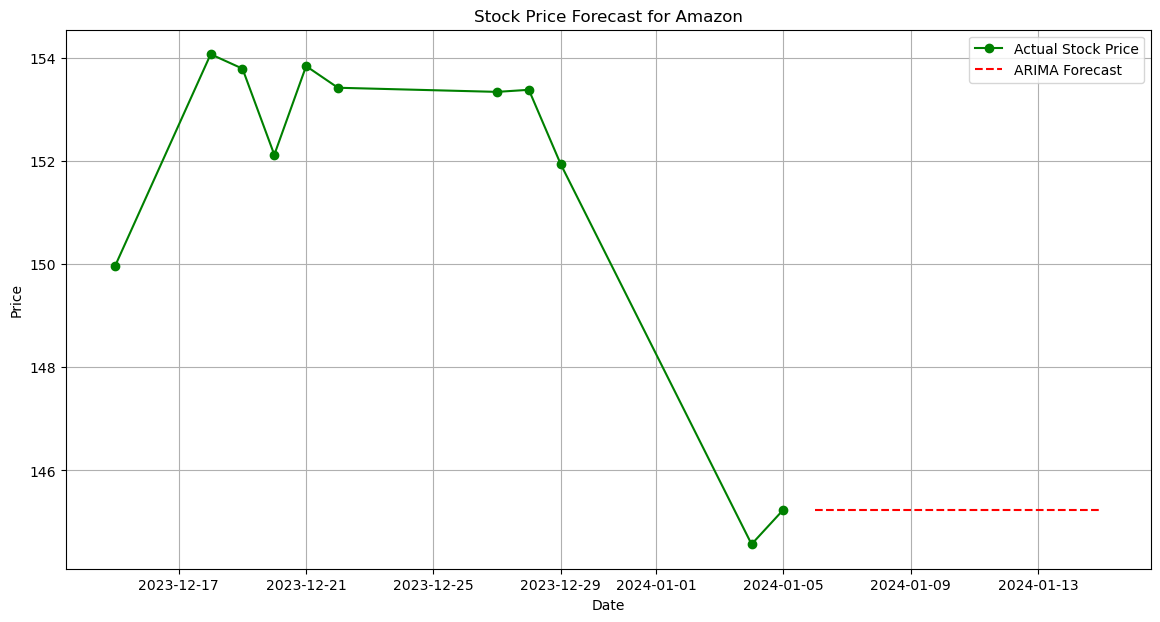

Linear Regression Model Summary for Facebook:

                            OLS Regression Results                            
Dep. Variable:               Facebook   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     475.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.23e-168
Time:                        20:03:41   Log-Likelihood:                -3679.8
No. Observations:                 704   AIC:                             7368.
Df Residuals:                     700   BIC:                             7386.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

/Users/adolek/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/adolek/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


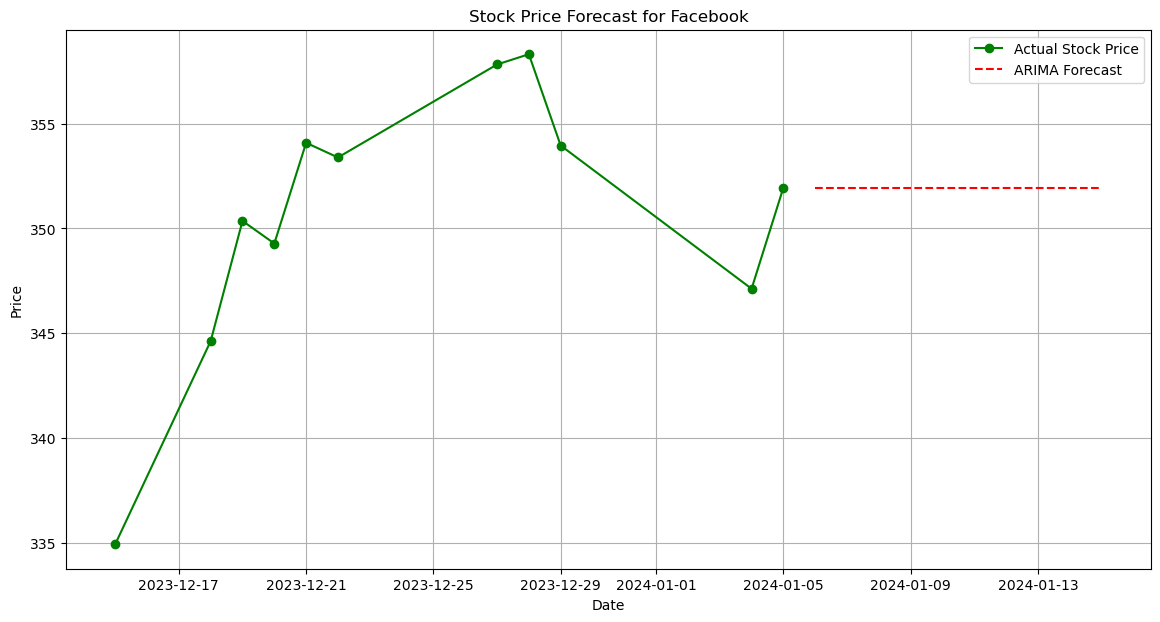

Linear Regression Model Summary for Google:

                            OLS Regression Results                            
Dep. Variable:                 Google   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1330.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.63e-288
Time:                        20:03:41   Log-Likelihood:                -2331.7
No. Observations:                 704   AIC:                             4671.
Df Residuals:                     700   BIC:                             4690.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

/Users/adolek/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/adolek/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


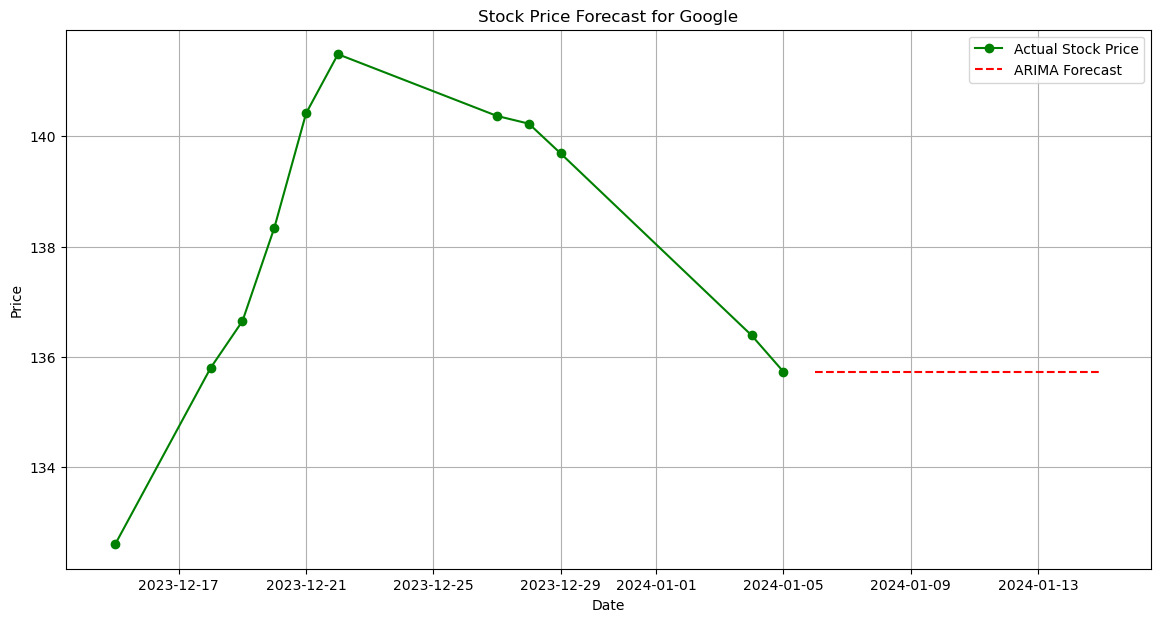

In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}\n")

def analyze_stock(stock_name):
    y = data[stock_name]  # Dependent variable for the selected stock

    # Linear Regression
    X = data[['SP500', 'CAC40', 'Nikkei']]  # Independent variables
    X = sm.add_constant(X)  # Adding a constant
    lr_model = sm.OLS(y, X).fit()
    print(f"Linear Regression Model Summary for {stock_name}:\n")
    print(lr_model.summary())

    # Auto ARIMA
    print(f"\nAuto ARIMA Model for {stock_name}:")
    arima_model = auto_arima(y, start_p=1, start_q=1,
                             test='adf',       # use adftest to find optimal 'd'
                             max_p=3, max_q=3, # maximum p and q
                             m=1,              # frequency of series
                             d=None,           # let model determine 'd'
                             seasonal=False,   # No Seasonality
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)
    print(arima_model.summary())
    arima_forecast = arima_model.predict(n_periods=10)
    print(f"Next 10 Predictions for {stock_name}: {arima_forecast}\n")

    # Evaluate Linear Regression Model
    lr_forecast = lr_model.predict(X.iloc[-10:])  # Predictions for the next 10 points
    evaluate_model(y[-10:], lr_forecast, "Linear Regression")

    # Evaluate Auto ARIMA Model
    evaluate_model(y[-10:], arima_forecast, "Auto ARIMA")

    # Plotting
    plt.figure(figsize=(14, 7))
    date_range = pd.date_range(start=y.index[-1] + pd.DateOffset(days=1), periods=10)
    plt.plot(y.index[-11:], y[-11:], label='Actual Stock Price', color='green', marker='o')
    plt.plot(date_range, arima_forecast, label='ARIMA Forecast', color='red', linestyle='--')
    plt.title(f'Stock Price Forecast for {stock_name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return arima_forecast

# Analyzing Amazon
arima_forecast_amazon = analyze_stock('Amazon')

# Analyzing Facebook
arima_forecast_facebook = analyze_stock('Facebook')

# Analyzing Google
arima_forecast_google = analyze_stock('Google')


### LSTM

In [34]:
# Calculate moving averages for each stock
data['Google_MA'] = data['Google'].rolling(window=5).mean()
data['Facebook_MA'] = data['Facebook'].rolling(window=5).mean()
data['Amazon_MA'] = data['Amazon'].rolling(window=5).mean()
data['SP500_MA'] = data['SP500'].rolling(window=5).mean()
data['CAC40_MA'] = data['CAC40'].rolling(window=5).mean()
data['Nikkei_MA'] = data['Nikkei'].rolling(window=5).mean()

# Drop NaN values generated by moving averages
data.dropna(inplace=True)
data

,Google,Facebook,Amazon,SP500,CAC40,Nikkei,Google_MA,Facebook_MA,Amazon_MA,SP500_MA,CAC40_MA,Nikkei_MA
timestamp,,,,,,,,,,,,
2021-01-14,86.545998,245.639999,156.373505,3795.540039,5681.140137,28698.259766,87.877701,256.935999,157.590500,3807.008008,5674.302051,28189.669922
2021-01-15,86.380997,251.360001,155.212494,3768.250000,5611.689941,28519.179688,87.410500,253.460001,157.011398,3799.900000,5662.670020,28395.479687
2021-01-19,89.223503,261.100006,156.037994,3798.909912,5598.609863,28633.460938,87.276900,252.166000,156.391998,3794.745996,5641.016016,28494.366016
2021-01-20,94.003502,267.480011,163.169006,3851.850098,5628.439941,28523.259766,88.703300,255.444003,157.817499,3804.878027,5636.509961,28566.150000
2021-01-21,94.207497,272.869995,165.349503,3853.070068,5590.790039,28756.859375,90.072299,259.690002,159.228500,3813.524023,5622.133984,28626.203906
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,140.369995,357.829987,153.339996,4781.580078,7571.819824,33681.238281,139.453998,352.989996,153.301996,4749.936035,7574.027930,33377.217969
2023-12-28,140.229996,358.320007,153.380005,4783.350098,7535.160156,33539.621094,140.169998,354.582001,153.219998,4752.932031,7566.125977,33441.264062
2023-12-29,139.690002,353.959991,151.940002,4769.830078,7543.180176,33464.171875,140.439999,355.517999,153.184000,4767.228027,7558.075977,33398.910156


Epoch 1/100
444/444 - 2s - loss: 0.0441 - val_loss: 0.0165 - 2s/epoch - 5ms/step
Epoch 2/100
444/444 - 1s - loss: 0.0209 - val_loss: 0.0144 - 681ms/epoch - 2ms/step
Epoch 3/100
444/444 - 1s - loss: 0.0187 - val_loss: 0.0139 - 681ms/epoch - 2ms/step
Epoch 4/100
444/444 - 1s - loss: 0.0178 - val_loss: 0.0118 - 700ms/epoch - 2ms/step
Epoch 5/100
444/444 - 1s - loss: 0.0159 - val_loss: 0.0147 - 681ms/epoch - 2ms/step
Epoch 6/100
444/444 - 1s - loss: 0.0161 - val_loss: 0.0112 - 679ms/epoch - 2ms/step
Epoch 7/100
444/444 - 1s - loss: 0.0147 - val_loss: 0.0102 - 679ms/epoch - 2ms/step
Epoch 8/100
444/444 - 1s - loss: 0.0143 - val_loss: 0.0103 - 679ms/epoch - 2ms/step
Epoch 9/100
444/444 - 1s - loss: 0.0147 - val_loss: 0.0101 - 675ms/epoch - 2ms/step
Epoch 10/100
444/444 - 1s - loss: 0.0141 - val_loss: 0.0113 - 737ms/epoch - 2ms/step
Epoch 11/100
444/444 - 1s - loss: 0.0132 - val_loss: 0.0114 - 842ms/epoch - 2ms/step
Epoch 12/100
444/444 - 1s - loss: 0.0133 - val_loss: 0.0101 - 685ms/epoch - 2

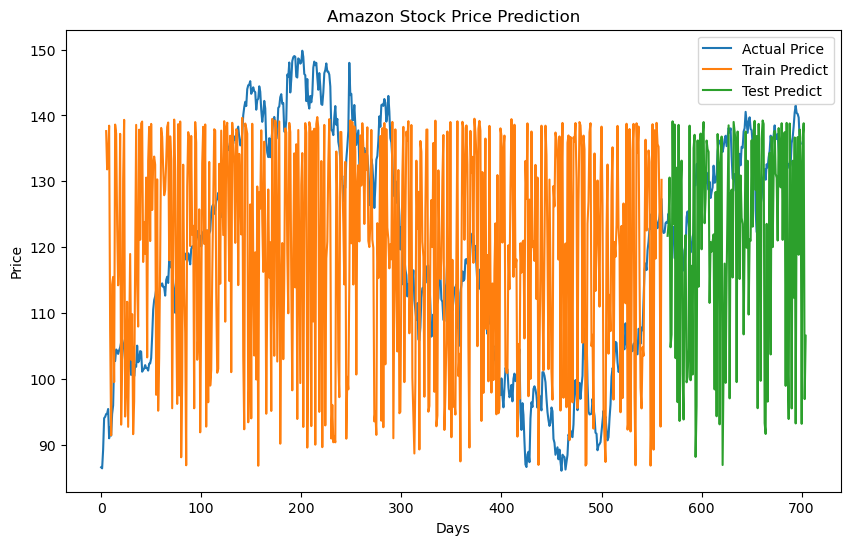

In [35]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

# Prepare the data for LSTM
def prepare_data_for_amazon(data, look_back):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back, 3:])  # Features: SP500, CAC40, Nikkei
        Y.append(data[i+look_back, 2])     # Target: Amazon's stock price
    return np.array(X), np.array(Y)

def prepare_data(data, look_back):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back, 9:])  # Features: Indices and moving averages
        Y.append(data[i+look_back, 8])     # Target: Amazon's stock price
    return np.array(X), np.array(Y)


look_back = 5  # Number of previous days to consider
X, Y = prepare_data(scaled_data, look_back)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2, callbacks=[early_stop], validation_split=0.2)


# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to the original scale
train_predict = scaler.inverse_transform(np.column_stack((train_predict, np.zeros((train_predict.shape[0], scaled_data.shape[1]-1)))))
test_predict = scaler.inverse_transform(np.column_stack((test_predict, np.zeros((test_predict.shape[0], scaled_data.shape[1]-1)))))

# Extracting the predicted prices
train_predict = train_predict[:, 0]
test_predict = test_predict[:, 0]

# Plotting
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(scaled_data)[:, 0], label='Actual Price')
plt.plot(np.arange(look_back, len(train_predict)+look_back), train_predict, label='Train Predict')
plt.plot(np.arange(len(train_predict)+(look_back*2), len(train_predict)+(look_back*2)+len(test_predict)), test_predict, label='Test Predict')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


In [36]:
def prepare_data_for_google(data, look_back):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back, 3:])  # Features: SP500, CAC40, Nikkei
        Y.append(data[i+look_back, 0])     # Target: Google's stock price
    return np.array(X), np.array(Y)


In [37]:
def prepare_data_for_facebook(data, look_back):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back, 3:])  # Features: SP500, CAC40, Nikkei
        Y.append(data[i+look_back, 1])     # Target: Facebook's stock price
    return np.array(X), np.array(Y)


In [38]:
data

,Google,Facebook,Amazon,SP500,CAC40,Nikkei,Google_MA,Facebook_MA,Amazon_MA,SP500_MA,CAC40_MA,Nikkei_MA
timestamp,,,,,,,,,,,,
2021-01-14,86.545998,245.639999,156.373505,3795.540039,5681.140137,28698.259766,87.877701,256.935999,157.590500,3807.008008,5674.302051,28189.669922
2021-01-15,86.380997,251.360001,155.212494,3768.250000,5611.689941,28519.179688,87.410500,253.460001,157.011398,3799.900000,5662.670020,28395.479687
2021-01-19,89.223503,261.100006,156.037994,3798.909912,5598.609863,28633.460938,87.276900,252.166000,156.391998,3794.745996,5641.016016,28494.366016
2021-01-20,94.003502,267.480011,163.169006,3851.850098,5628.439941,28523.259766,88.703300,255.444003,157.817499,3804.878027,5636.509961,28566.150000
2021-01-21,94.207497,272.869995,165.349503,3853.070068,5590.790039,28756.859375,90.072299,259.690002,159.228500,3813.524023,5622.133984,28626.203906
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,140.369995,357.829987,153.339996,4781.580078,7571.819824,33681.238281,139.453998,352.989996,153.301996,4749.936035,7574.027930,33377.217969
2023-12-28,140.229996,358.320007,153.380005,4783.350098,7535.160156,33539.621094,140.169998,354.582001,153.219998,4752.932031,7566.125977,33441.264062
2023-12-29,139.690002,353.959991,151.940002,4769.830078,7543.180176,33464.171875,140.439999,355.517999,153.184000,4767.228027,7558.075977,33398.910156


### XGboost

In [39]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:

lags = 3  # Increasing the number of lags
for column in ['SP500', 'CAC40', 'Nikkei', 'Amazon']:
    for lag in range(1, lags + 1):
        data[f'{column}_lag_{lag}'] = data[column].shift(lag)

# Add rolling window statistics
rolling_windows = [5, 10]  # Example window sizes
for column in ['SP500', 'CAC40', 'Nikkei', 'Amazon']:
    for window in rolling_windows:
        data[f'{column}_rolling_mean_{window}'] = data[column].rolling(window=window).mean()
        data[f'{column}_rolling_std_{window}'] = data[column].rolling(window=window).std()

# Calculate Relative Strength Index (RSI) for Amazon
window_length = 14
delta = data['Amazon'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
roll_up = up.rolling(window_length).mean()
roll_down = down.rolling(window_length).mean()
RS = roll_up / roll_down
data['Amazon_RSI'] = 100.0 - (100.0 / (1.0 + RS))

# Calculate Moving Averages for Amazon
for window in [5, 10, 20]:
    data[f'Amazon_SMA_{window}'] = data['Amazon'].rolling(window=window).mean()
    data[f'Amazon_EMA_{window}'] = data['Amazon'].ewm(span=window, adjust=False).mean()

# Drop rows with NaN values resulting from lagging and rolling statistics
data.dropna(inplace=True)

# Displaying a portion of the enhanced dataset
data.head()


,Google,Facebook,Amazon,SP500,CAC40,Nikkei,Google_MA,Facebook_MA,Amazon_MA,SP500_MA,...,Amazon_rolling_std_5,Amazon_rolling_mean_10,Amazon_rolling_std_10,Amazon_RSI,Amazon_SMA_5,Amazon_EMA_5,Amazon_SMA_10,Amazon_EMA_10,Amazon_SMA_20,Amazon_EMA_20
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-03-15,102.722000,273.750000,154.084000,3968.939941,6035.970215,29766.970703,102.815300,269.333997,154.052502,3925.174023,...,1.120756,152.173801,2.775223,42.455444,154.052502,153.730024,152.173801,153.805489,156.261726,155.661205
2021-03-16,104.194504,279.279999,154.593002,3962.709961,6055.430176,29921.089844,103.250601,272.041998,154.342603,3942.628027,...,1.008418,152.160451,2.761868,44.758087,154.342603,154.017683,152.160451,153.948673,155.797101,155.559471
2021-03-17,104.111000,284.010010,156.786499,3974.120117,6054.819824,29914.330078,103.710901,275.864001,155.123502,3957.690039,...,1.102031,152.814101,3.020838,56.692839,155.123502,154.940622,152.814101,154.464642,155.464051,155.676331
2021-03-18,101.067001,278.619995,151.399506,3915.459961,6062.790039,30216.750000,102.918901,276.812000,154.267502,3952.914014,...,1.920496,153.066202,2.748852,45.072399,154.267502,153.760250,153.066202,153.907344,154.762426,155.269014
2021-03-19,101.348000,290.109985,153.748001,3913.100098,5997.959961,29792.050781,102.688501,281.153998,154.122202,3946.866016,...,1.928386,153.438702,2.534690,44.547255,154.122202,153.756167,153.438702,153.878373,154.129251,155.124156


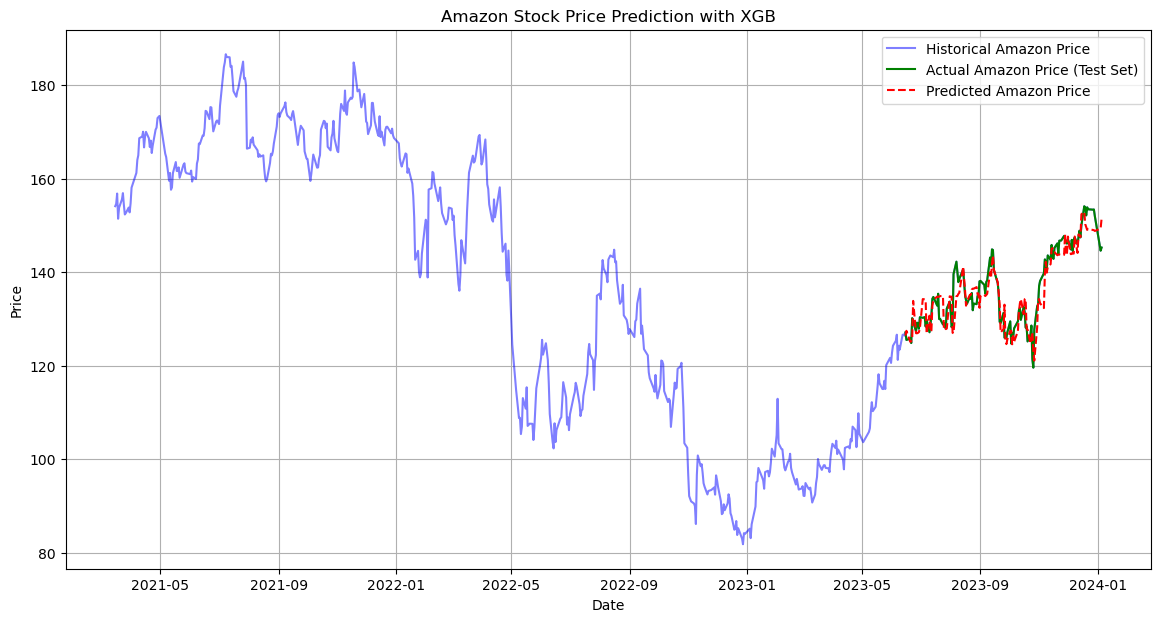

Amazon Mean Squared Error: 10.478670139752392
Amazon R-squared: 0.8488918426522152


In [42]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

# Update features and target
# Excluding the original 'SP500', 'CAC40', 'Nikkei', 'Amazon' columns to avoid data leakage
features = [col for col in data.columns if col not in ['Google',	'Facebook','SP500', 'CAC40', 'Nikkei', 'Amazon']]
X = data[features]
y = data['Amazon']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Amazon'], label='Historical Amazon Price', color='blue', alpha=0.5)  # Full historical data
plt.plot(X_test.index, y_test, label='Actual Amazon Price (Test Set)', color='green')  # Actual prices in test set
plt.plot(X_test.index, y_pred, label='Predicted Amazon Price', color='red', linestyle='--')  # Predicted prices

plt.title('Amazon Stock Price Prediction with XGB')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

# Calculating accuracy metrics for Amazon
mse_amazon = mean_squared_error(y_test, y_pred)
r2_amazon = r2_score(y_test, y_pred)

# Printing the metrics
print("Amazon Mean Squared Error:", mse_amazon)
print("Amazon R-squared:", r2_amazon)


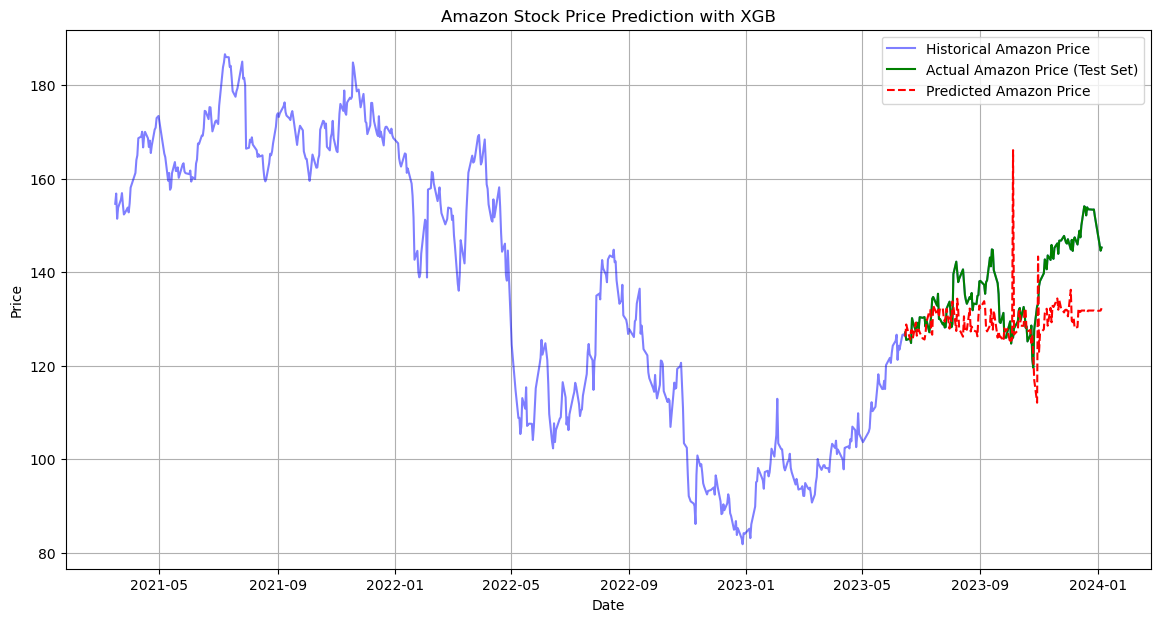

In [43]:

# Create lagged features
lags = 1  # We can increase the number of lags as needed
for column in ['SP500', 'CAC40', 'Nikkei']:
    for lag in range(1, lags + 1):
        data[f'{column}_lag_{lag}'] = data[column].shift(lag)

# Drop rows with NaN values (due to lagging)
data.dropna(inplace=True)

# Define features and target
X = data[['SP500_lag_1', 'CAC40_lag_1', 'Nikkei_lag_1']]
y = data['Amazon']

# Train/Test split
X_train_amazon, X_test_amazon, y_train_amazon, y_test_amazon = train_test_split(X, y, test_size=0.2, shuffle=False)

# XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train_amazon, y_train_amazon)

# Predictions
y_pred_amazon = model.predict(X_test_amazon)

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Amazon'], label='Historical Amazon Price', color='blue', alpha=0.5)  # Full historical data
plt.plot(X_test_amazon.index, y_test_amazon, label='Actual Amazon Price (Test Set)', color='green')  # Actual prices in test set
plt.plot(X_test_amazon.index, y_pred_amazon, label='Predicted Amazon Price', color='red', linestyle='--')  # Predicted prices

plt.title('Amazon Stock Price Prediction with XGB')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


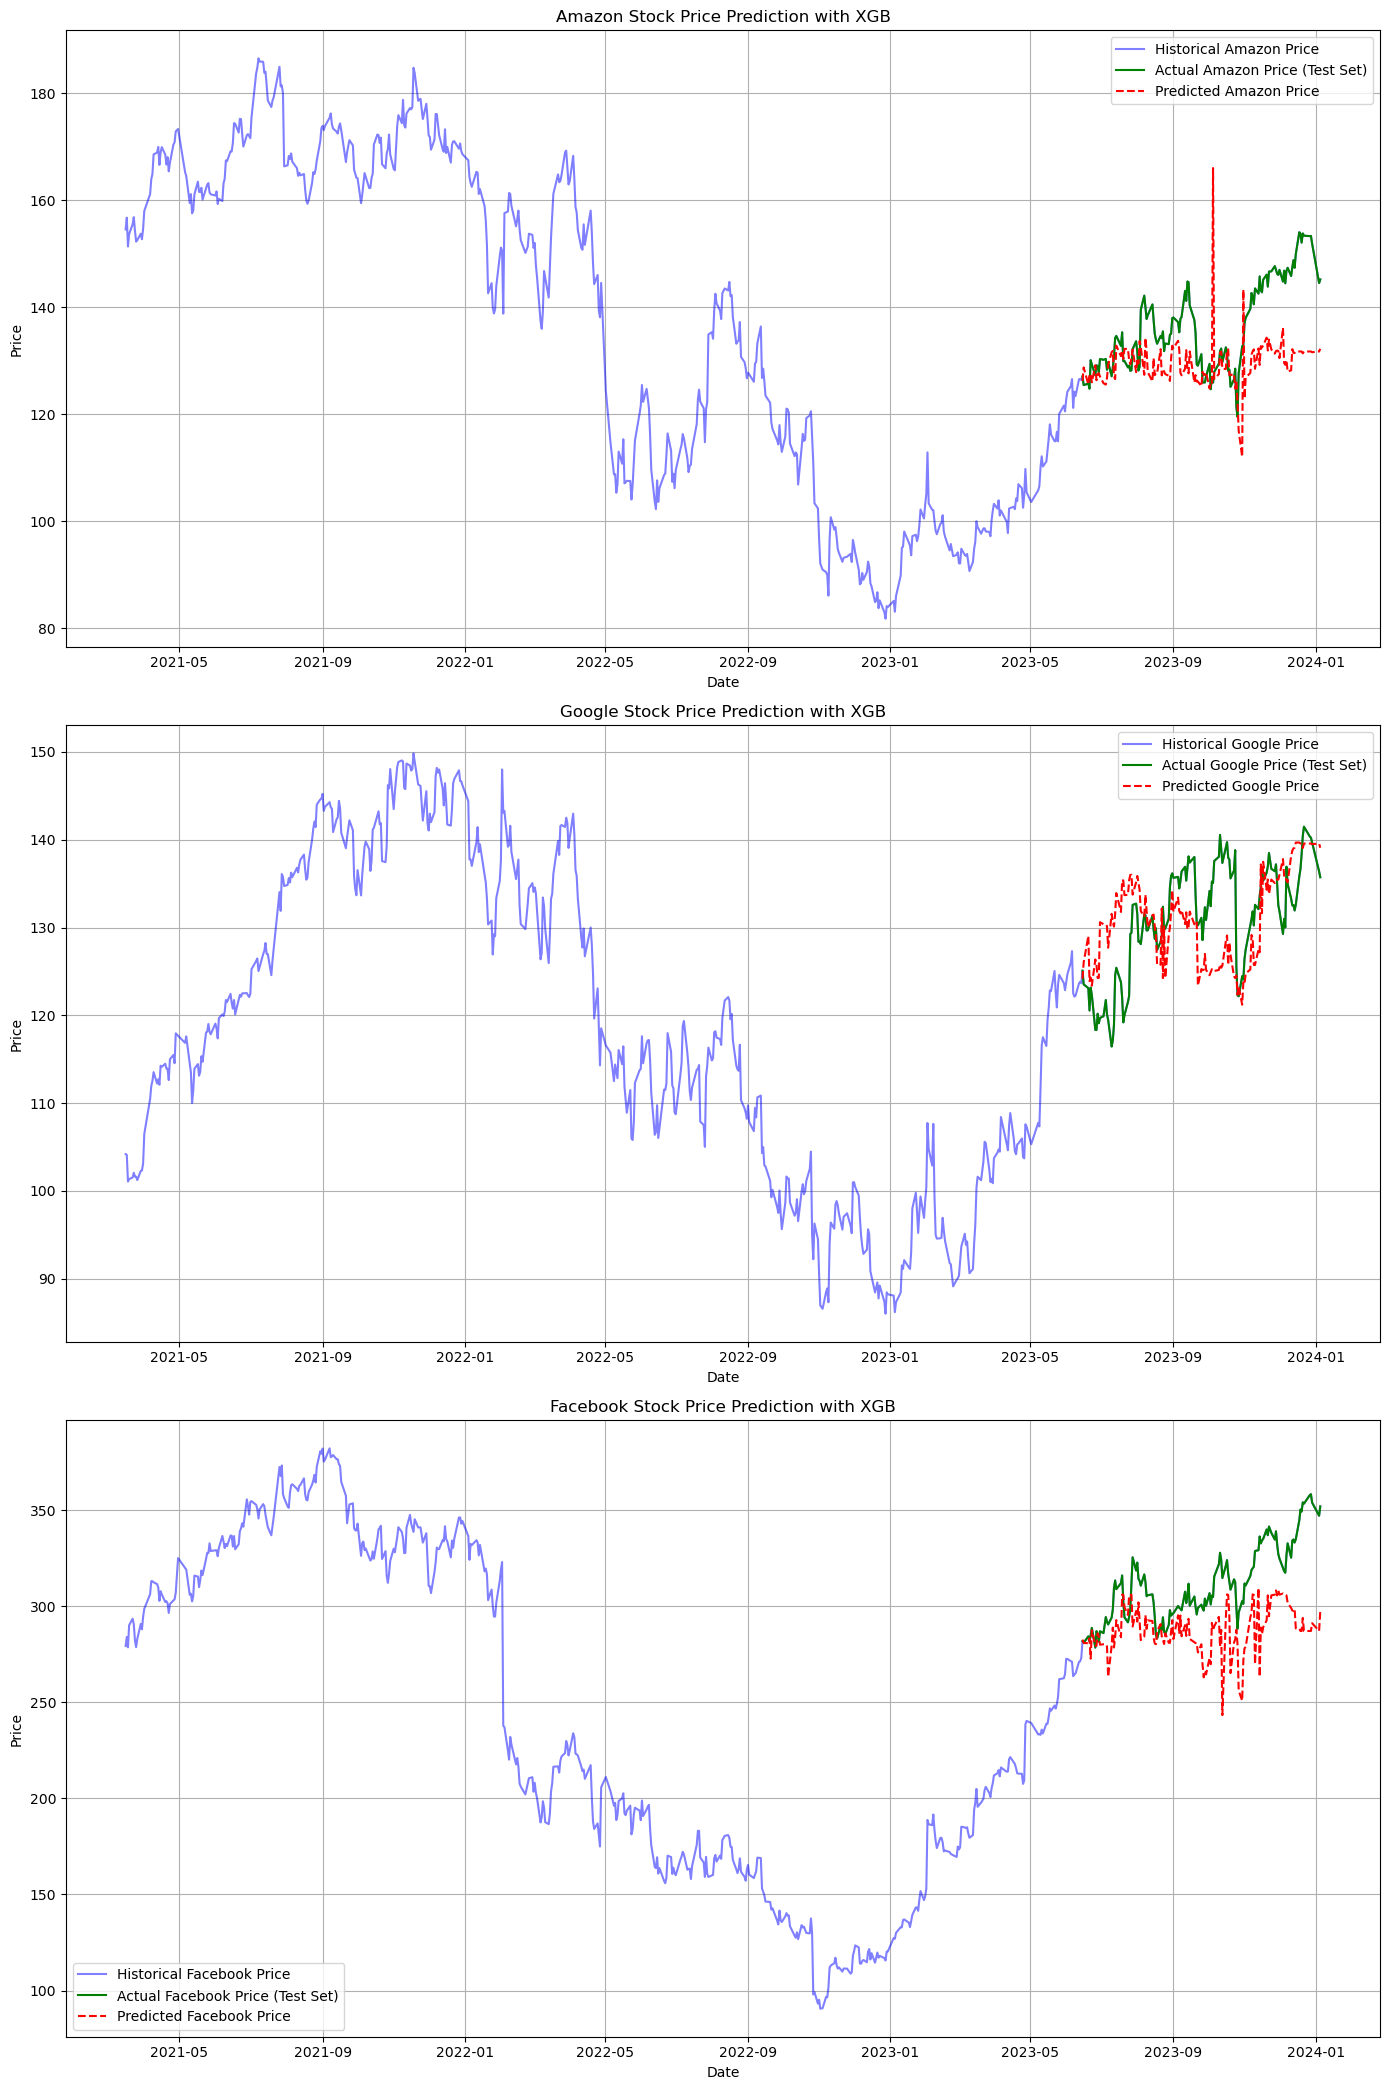

In [44]:

# For Google
y_google = data['Google']
X_train_google, X_test_google, y_train_google, y_test_google = train_test_split(X, y_google, test_size=0.2, shuffle=False)

# XGBoost model for Google
model_google = xgb.XGBRegressor(objective='reg:squarederror')
model_google.fit(X_train_google, y_train_google)

# Predictions for Google
y_pred_google = model_google.predict(X_test_google)

# For Facebook
y_facebook = data['Facebook']
X_train_facebook, X_test_facebook, y_train_facebook, y_test_facebook = train_test_split(X, y_facebook, test_size=0.2, shuffle=False)

# XGBoost model for Facebook
model_facebook = xgb.XGBRegressor(objective='reg:squarederror')
model_facebook.fit(X_train_facebook, y_train_facebook)

# Predictions for Facebook
y_pred_facebook = model_facebook.predict(X_test_facebook)
plt.figure(figsize=(14, 21))  # Adjusted figure size for 3 subplots

# Plotting for Amazon
plt.subplot(3, 1, 1)
plt.plot(data.index, data['Amazon'], label='Historical Amazon Price', color='blue', alpha=0.5)  # Full historical data
plt.plot(X_test_amazon.index, y_test_amazon, label='Actual Amazon Price (Test Set)', color='green')  # Actual prices in test set
plt.plot(X_test_amazon.index, y_pred_amazon, label='Predicted Amazon Price', color='red', linestyle='--')  # Predicted prices
plt.title('Amazon Stock Price Prediction with XGB')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plotting for Google
plt.subplot(3, 1, 2)
plt.plot(data.index, data['Google'], label='Historical Google Price', color='blue', alpha=0.5)  # Full historical data
plt.plot(X_test_google.index, y_test_google, label='Actual Google Price (Test Set)', color='green')  # Actual prices in test set
plt.plot(X_test_google.index, y_pred_google, label='Predicted Google Price', color='red', linestyle='--')  # Predicted prices
plt.title('Google Stock Price Prediction with XGB')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plotting for Facebook
plt.subplot(3, 1, 3)
plt.plot(data.index, data['Facebook'], label='Historical Facebook Price', color='blue', alpha=0.5)  # Full historical data
plt.plot(X_test_facebook.index, y_test_facebook, label='Actual Facebook Price (Test Set)', color='green')  # Actual prices in test set
plt.plot(X_test_facebook.index, y_pred_facebook, label='Predicted Facebook Price', color='red', linestyle='--')  # Predicted prices
plt.title('Facebook Stock Price Prediction with XGB')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating accuracy metrics for Amazon
mse_amazon = mean_squared_error(y_test_amazon, y_pred_amazon)
r2_amazon = r2_score(y_test_amazon, y_pred_amazon)

# Calculating accuracy metrics for Google
mse_google = mean_squared_error(y_test_google, y_pred_google)
r2_google = r2_score(y_test_google, y_pred_google)

# Calculating accuracy metrics for Facebook
mse_facebook = mean_squared_error(y_test_facebook, y_pred_facebook)
r2_facebook = r2_score(y_test_facebook, y_pred_facebook)

# Printing the metrics
print("Amazon Mean Squared Error:", mse_amazon)
print("Amazon R-squared:", r2_amazon)
print("")
print("Google Mean Squared Error:", mse_google)
print("Google R-squared:", r2_google)
print("")
print("Facebook Mean Squared Error:", mse_facebook)
print("Facebook R-squared:", r2_facebook)


Amazon Mean Squared Error: 117.35660071974215
Amazon R-squared: -0.692346399958248

Google Mean Squared Error: 45.53581598928307
Google R-squared: -0.1613707201753951

Facebook Mean Squared Error: 914.8011083817039
Facebook R-squared: -1.4015121867986884


## Online Methods: River

**Time Series : Sarimax**

In [47]:
! pip install river
from river import time_series
import pandas as pd
from river import compose
from river import linear_model
from river import optim
from river import preprocessing
from river import time_series
import calendar
import math
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
# Isolate stock prices
df_amazon = data['Amazon']
df_google = data['Google']
df_facebook = data['Facebook']

# SNARIMAX Model Parameters
period = 12
model_params = {
    'p': period,
    'd': 1,
    'q': period,
    'm': period,
    'sd': 1
}

# Forecasting function
def forecast_stock_prices(stock_data, model_params, horizon):
    model = time_series.SNARIMAX(**model_params)
    for y in stock_data:
        model.learn_one(y)
    future_dates = [stock_data.index[-1] + pd.DateOffset(months=i) for i in range(1, horizon + 1)]
    forecast = model.forecast(horizon=horizon)
    return future_dates, forecast

# Forecasting for Amazon
future_dates_amazon, forecast_amazon = forecast_stock_prices(df_amazon, model_params, horizon=12)
for date, y_pred in zip(future_dates_amazon, forecast_amazon):
    print(f"Amazon {date.strftime('%Y-%m-%d')}: {y_pred:.3f}")

print("")

# Forecasting for Google
future_dates_google, forecast_google = forecast_stock_prices(df_google, model_params, horizon=12)
for date, y_pred in zip(future_dates_google, forecast_google):
    print(f"Google {date.strftime('%Y-%m-%d')}: {y_pred:.3f}")

print("")

# Forecasting for Facebook
future_dates_facebook, forecast_facebook = forecast_stock_prices(df_facebook, model_params, horizon=12)
for date, y_pred in zip(future_dates_facebook, forecast_facebook):
    print(f"Facebook {date.strftime('%Y-%m-%d')}: {y_pred:.3f}")


TypeError: unsupported operand type(s) for *: 'float' and 'river.utils.vectordict.VectorDict'

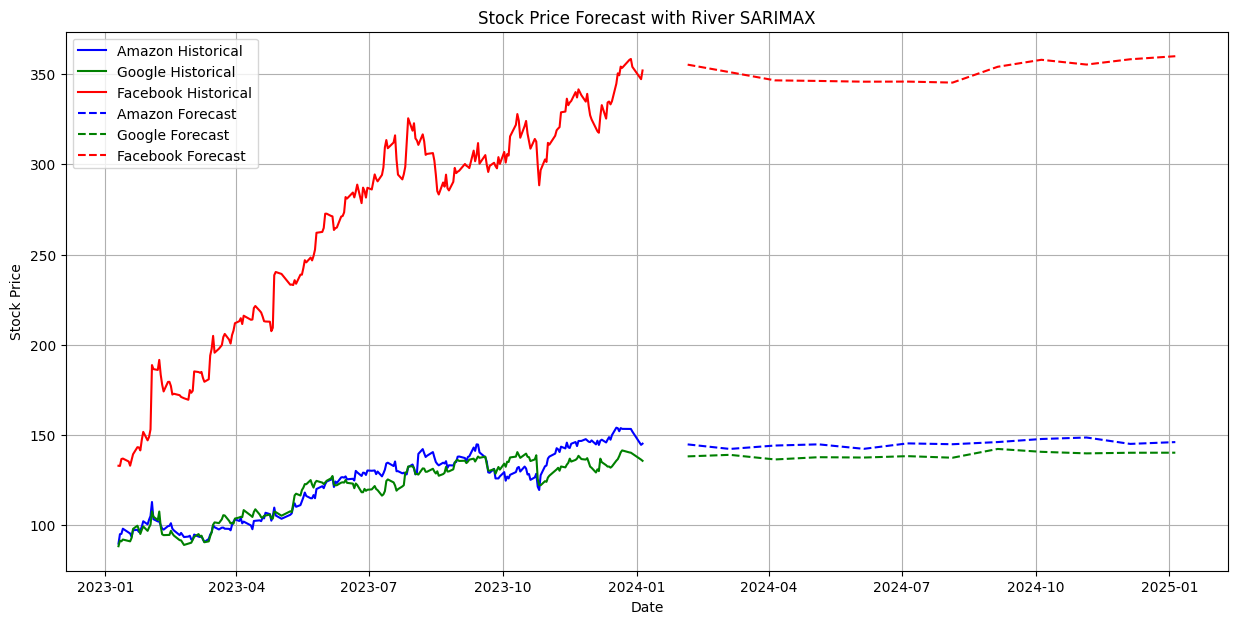

In [ ]:
plt.figure(figsize=(15, 7))

# Historical data
plt.plot(df_amazon.index, df_amazon, label='Amazon Historical', color='blue')
plt.plot(df_google.index, df_google, label='Google Historical', color='green')
plt.plot(df_facebook.index, df_facebook, label='Facebook Historical', color='red')

# Forecast data
plt.plot(future_dates_amazon, forecast_amazon, label='Amazon Forecast', color='blue', linestyle='dashed')
plt.plot(future_dates_google, forecast_google, label='Google Forecast', color='green', linestyle='dashed')
plt.plot(future_dates_facebook, forecast_facebook, label='Facebook Forecast', color='red', linestyle='dashed')

plt.title('Stock Price Forecast with River SARIMAX')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Forecasting function using ARIMA for a single stock
def forecast_next_week(stock_series):
    # Fit the ARIMA model (you might need to adjust the order (p,d,q) according to your data)
    model = ARIMA(stock_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast the next 5 days (assuming 5 trading days in a week)
    forecast = model_fit.forecast(steps=5)

    return forecast

# Forecast for the next week
amazon_forecast = forecast_next_week(data['Amazon'])
google_forecast = forecast_next_week(data['Google'])
facebook_forecast = forecast_next_week(data['Facebook'])

# Create a DataFrame to hold the forecast values for nezt week
forecast_df = pd.DataFrame({
    'Amazon': amazon_forecast,
    'Google': google_forecast,
    'Facebook': facebook_forecast
})

forecast_df


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

,Amazon,Google,Facebook
234,145.560091,135.735353,352.234442
235,145.692249,135.734262,351.962665
236,145.746815,135.734484,352.222352
237,145.769345,135.734439,351.974217
238,145.778647,135.734448,352.211313


<ipython-input-55-52699bfd6f41>:27: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=last_historical_date, periods=len(values)+1, closed='right')


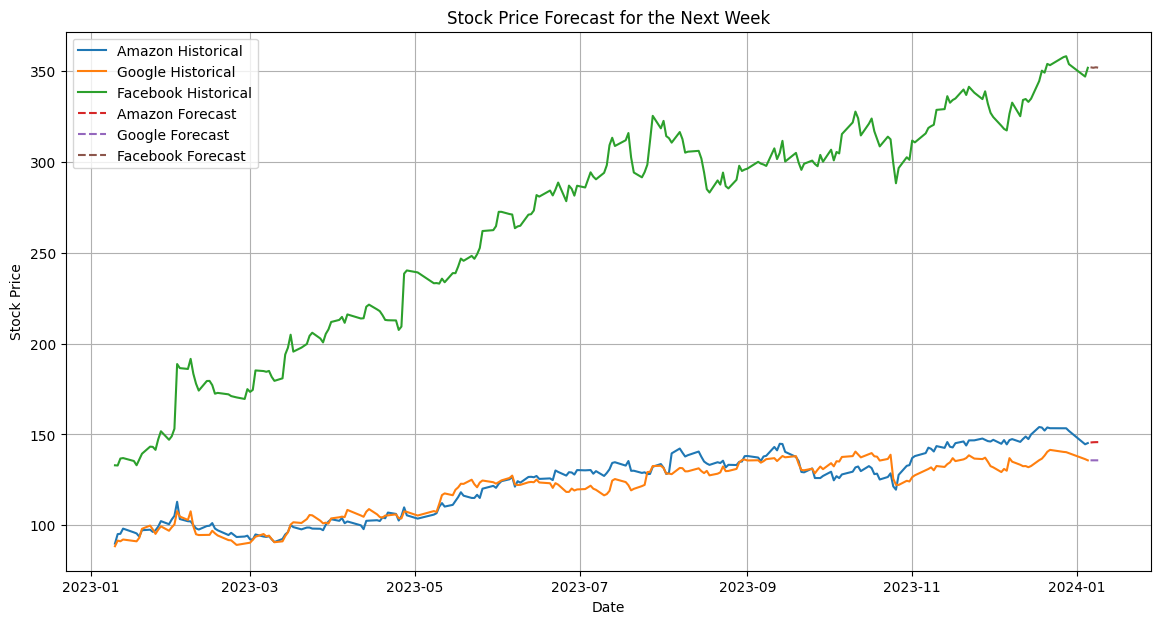

In [ ]:
historical_data = {
    'Amazon': data['Amazon'],
    'Google': data['Google'],
    'Facebook': data['Facebook']
}

# Sample forecast data for the next week
forecast_data = forecast_df

# Plotting
plt.figure(figsize=(14, 7))

# Plot historical data
for company, values in historical_data.items():
    plt.plot(values.index, values, label=f'{company} Historical')

# Plot forecast data
for company, values in forecast_data.items():
    # Assuming the last date in historical data is the starting point for the forecast
    last_historical_date = historical_data[company].index[-1]
    forecast_dates = pd.date_range(start=last_historical_date, periods=len(values)+1, closed='right')
    plt.plot(forecast_dates, values, label=f'{company} Forecast', linestyle='--')

plt.title('Stock Price Forecast for the Next Week')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-59-10cf54af39a4>:21: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=last_historical_date, periods=len(forecast_data)+1, closed='right')


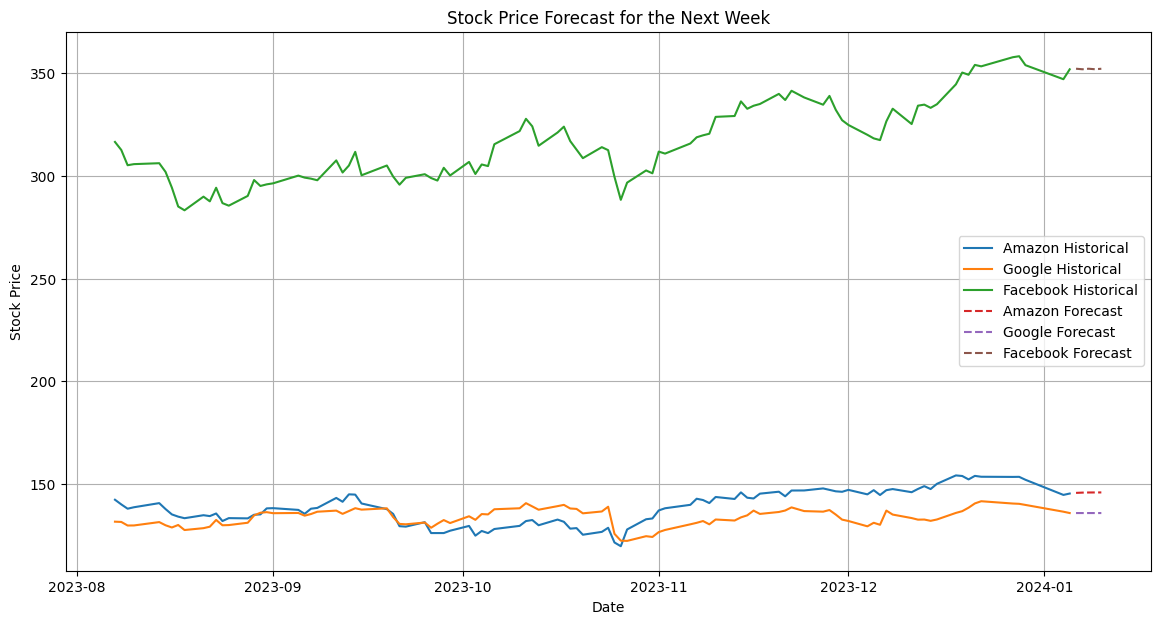

In [ ]:
# plot only 3 months

three_months_ago = data.index.max() - pd.DateOffset(months=5)
data_last_three_months = data[data.index >= three_months_ago]


forecast_data = forecast_df

# Plotting
plt.figure(figsize=(14, 7))

# Plot historical data from the last three months
for company in ['Amazon', 'Google', 'Facebook']:
    plt.plot(data_last_three_months.index, data_last_three_months[company], label=f'{company} Historical')

# Plot forecast data
for company in forecast_df.columns:
    # Assuming the last date in historical data is the starting point for the forecast
    last_historical_date = data_last_three_months.index[-1]
    forecast_dates = pd.date_range(start=last_historical_date, periods=len(forecast_data)+1, closed='right')
    plt.plot(forecast_dates, forecast_data[company], label=f'{company} Forecast', linestyle='--')

plt.title('Stock Price Forecast for the Next Week')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
data

,Google,Facebook,Amazon,SP500,CAC40,Nikkei
Date,,,,,,
2023-01-10,88.419998,132.990005,89.870003,3919.250000,6869.140137,26175.560547
2023-01-11,91.519997,132.889999,95.089996,3969.610107,6924.189941,26446.000000
2023-01-12,91.129997,136.710007,95.269997,3983.169922,6975.680176,26449.820312
2023-01-13,92.120003,136.979996,98.120003,3999.090088,7023.500000,26119.519531
2023-01-17,91.290001,135.360001,96.050003,3990.969971,7077.160156,26138.679688
...,...,...,...,...,...,...
2023-12-27,140.369995,357.829987,153.339996,4781.580078,7571.819824,33681.238281
2023-12-28,140.229996,358.320007,153.380005,4783.350098,7535.160156,33539.621094
2023-12-29,139.690002,353.959991,151.940002,4769.830078,7543.180176,33464.171875


In [ ]:

# we're forecasting for 'Amazon'
# Feature extraction for time series forecasting
y = data['Amazon']

def get_month_distances(x):
    month = x['month'].month
    return {
        calendar.month_name[m]: math.exp(-(month - m) ** 2)
        for m in range(1, 13)
    }

def get_ordinal_date(x):
    return {'ordinal_date': x['month'].toordinal()}

extract_features = compose.TransformerUnion(
    get_ordinal_date,
    get_month_distances
)

# Defining the model
model = (
    extract_features |
    time_series.SNARIMAX(
        p=1,
        d=0,
        q=0,
        m=12,
        sp=3,
        sq=6,
        regressor=(
            preprocessing.StandardScaler() |
            linear_model.LinearRegression(
                intercept_init=110,
                optimizer=optim.SGD(0.01),
                intercept_lr=0.3
            )
        )
    )
)

# Training the model with the historical data
for date, value in y.items():
    model.learn_one({'month': date}, value)

# Forecasting the next 5 days
horizon = 5
future_dates = [data.index[-1] + pd.DateOffset(days=i) for i in range(1, horizon + 1)]
forecast = model.forecast(horizon=horizon, xs=[{'month': date} for date in future_dates])

# Printing the forecast
for date, y_pred in zip(future_dates, forecast):
    print(date.strftime('%Y-%m-%d'), f'{y_pred:.3f}')


2024-01-06 943663975.685
2024-01-07 -257319897949288896.000
2024-01-08 70166437773322119681146880.000
2024-01-09 -19133106413588513821817305357615104.000
2024-01-10 5217248768083921643657706343110090558537728.000


In [ ]:


def add_lagged_features(df, lag=1):
    lagged_df = df.copy()
    for column in df.columns:
        if column != 'Amazon':
            lagged_df[f'{column}_lagged'] = df[column].shift(lag)
    lagged_df = lagged_df.dropna()
    return lagged_df

# Adding lagged features to your data
data_with_lags = add_lagged_features(data)

# Now, create a model pipeline that includes preprocessing
model = compose.Pipeline(
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(intercept_lr=0.3))
)

# Train the model
for x, y in zip(data_with_lags.drop('Amazon', axis=1).to_dict(orient='records'), data_with_lags['Amazon']):
    model = model.learn_one(x, y)

# Make a prediction for the next time step
next_step_features = data_with_lags.iloc[-1].drop('Amazon').to_dict()
prediction = model.predict_one(next_step_features)


AttributeError: 'NoneType' object has no attribute 'learn_one'